In [1]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from evaluation.eval_analysis import EvalDesc
from evaluation.premise_eval_analysis import PremiseEvalData, load_evals, get_mutual_proofs

In [2]:
if Path(os.curdir).resolve().name == "evaluation":
    os.chdir("../..")
elif Path(os.curdir).resolve().name == "coq-modeling": 
    pass
else:
    raise ValueError(f"In an unexpected directory: {os.curdir}")
    

In [3]:
EVALS = [
    # <====== Final Split =======>
    EvalDesc("TF-Idf", "prem-tfidf-proj-final-test-500"),
    EvalDesc("BM25", "prem-bm25-proj-final-test-500"),
    EvalDesc("Dense", "prem-select-proj-final-test-500"),


    # <====== Random split ======>
    #EvalDesc("TF-Idf", "prem-tfidf-proj-final-test-500"),
    # EvalDesc("BM25", "prem-bm25-proj-random-test-500"),
    # EvalDesc("Dense", "prem-select-proj-random-test-500"),


]

RESULTS_LOC = Path("evaluations/premise-results")
raw_evals = load_evals(EVALS, RESULTS_LOC)

In [4]:
mutual_proofs = get_mutual_proofs(raw_evals)
print("Num mutual", len(mutual_proofs))
evals = [e.filter(mutual_proofs) for e in raw_evals]

Num mutual 500


## Report Recalls

In [5]:
def create_recall_df(evals: list[PremiseEvalData], recalls: list[int]) -> pd.DataFrame:
    recall_data: list[list[float]] = []
    for e in evals: 
        e_recalls = [e.overall_recall_at_k(r) for r in recalls]
        recall_data.append(e_recalls)
    column_names = [f"Recall @ {r}" for r in recalls]
    idx = [e.alias for e in evals]
    return pd.DataFrame(recall_data, columns=column_names, index=idx)

create_recall_df(evals, [1, 10, 100])


,Recall @ 1,Recall @ 10,Recall @ 100
TF-Idf,0.030937,0.175379,0.493279
BM25,0.038831,0.156603,0.387881


## Plot Recalls

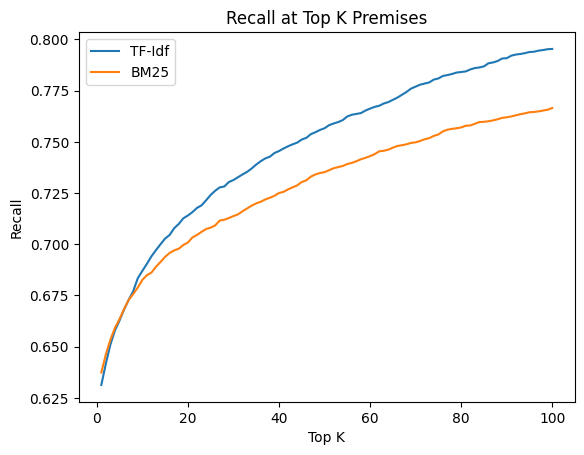

In [6]:
TOP_RECALL = 100
def plot_recalls(evals: list[PremiseEvalData], top_recall: int):
    fig, ax = plt.subplots()
    for e in evals: 
        recalls = [e.recall_at_k(k) for k in range(1, top_recall+1)]
        ax.plot(range(1, top_recall+1), recalls, label=e.alias)
    ax.set_xlabel("Top K")
    ax.set_ylabel("Recall")
    ax.set_title(f"Recall at Top K Premises")
    ax.legend()
    
plot_recalls(evals, TOP_RECALL)